In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Health Care Chatbot - Basic NLP

In [12]:
# import lib
import json
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [13]:
data_path = './intent.json'
with open(data_path, 'r') as f:
    data = json.load(f)
intents = data['intents']

In [14]:
X = []
y= []

for i in intents:
    for text in i['text']:
        X.append(text)
        y.append(i['intent'])

for i in range (10):
    print(f'\'{X[i]}\' is labeled {y[i]}')

'hello' is labeled greetings
'hey' is labeled greetings
'hi' is labeled greetings
'good day' is labeled greetings
'greetings' is labeled greetings
'what's up?' is labeled greetings
'how is it going' is labeled greetings
'cya' is labeled goodbye
'see you later' is labeled goodbye
'goodbye' is labeled goodbye


In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)

num_classes = len(set(y))
num_classes
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


80

In [16]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0,0,219
1,0,0,0,0,0,0,0,0,0,0,0,0,220
2,0,0,0,0,0,0,0,0,0,0,0,0,221
3,0,0,0,0,0,0,0,0,0,0,0,135,136
4,0,0,0,0,0,0,0,0,0,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0,0,0,0,0,0,0,0,0,0,91,23,61
344,0,0,0,0,0,0,0,0,0,0,77,529,19
345,0,0,0,0,0,0,0,87,115,530,15,49,71
346,0,0,0,0,0,0,0,0,0,531,16,77,125


In [17]:
X.max()

533

In [18]:
y

array([38, 38, 38, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37,  5,  5,  5,
        5,  5, 54, 54, 54, 54, 54, 19, 19, 19, 19, 19, 19, 19, 19, 34, 34,
       34, 34, 34, 34, 34, 34,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,
        2,  2,  0,  0,  0,  0,  0,  0, 18, 18, 18, 18, 33, 33, 33, 33, 23,
       23, 23, 23, 22, 22, 22, 22, 10, 10, 10, 10,  1,  1,  1,  1,  1, 32,
       32, 32, 32, 55, 55, 55, 55, 69, 69, 69, 69, 41, 41, 41, 41, 74, 74,
       74, 74, 35, 35, 35, 35,  7,  7,  7,  7, 66, 66, 66, 66, 42, 42, 42,
       42, 70, 70, 70, 70,  8,  8,  8,  8, 62, 62, 62, 62, 14, 14, 14, 14,
       27, 27, 27, 27, 50, 50, 50, 50, 63, 63, 63, 63, 66, 66, 66, 66, 71,
       71, 71, 71, 16, 16, 16, 16, 20, 20, 20, 20, 72, 72, 72, 72, 29, 29,
       29, 29, 47, 47, 47, 47,  9,  9,  9,  9, 44, 44, 44, 44, 49, 49, 49,
       49, 24, 24, 24, 24, 30, 30, 30, 30, 75, 75, 75, 75, 45, 45, 45, 45,
       65, 65, 65, 65, 57, 57, 57, 57, 68, 68, 68, 68, 43, 43, 43, 43, 31,
       31, 31, 31, 77, 77

In [19]:
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=X.shape[1]),
    LSTM(128),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=20, batch_size=32, validation_data=(X, y))

Epoch 1/20
11/11 [==============================] - 3s 72ms/step - loss: 4.3845 - accuracy: 0.0115 - val_loss: 4.3659 - val_accuracy: 0.0489
Epoch 2/20
11/11 [==============================] - 0s 20ms/step - loss: 4.3601 - accuracy: 0.0460 - val_loss: 4.3401 - val_accuracy: 0.0431
Epoch 3/20
11/11 [==============================] - 0s 21ms/step - loss: 4.3294 - accuracy: 0.0402 - val_loss: 4.2849 - val_accuracy: 0.0517
Epoch 4/20
11/11 [==============================] - 0s 19ms/step - loss: 4.2923 - accuracy: 0.0489 - val_loss: 4.2403 - val_accuracy: 0.0718
Epoch 5/20
11/11 [==============================] - 0s 20ms/step - loss: 4.2338 - accuracy: 0.0948 - val_loss: 4.1692 - val_accuracy: 0.0920
Epoch 6/20
11/11 [==============================] - 0s 20ms/step - loss: 4.1579 - accuracy: 0.0805 - val_loss: 4.0869 - val_accuracy: 0.0977
Epoch 7/20
11/11 [==============================] - 0s 18ms/step - loss: 4.0539 - accuracy: 0.0747 - val_loss: 3.9227 - val_accuracy: 0.1006
Epoch 8/20
11

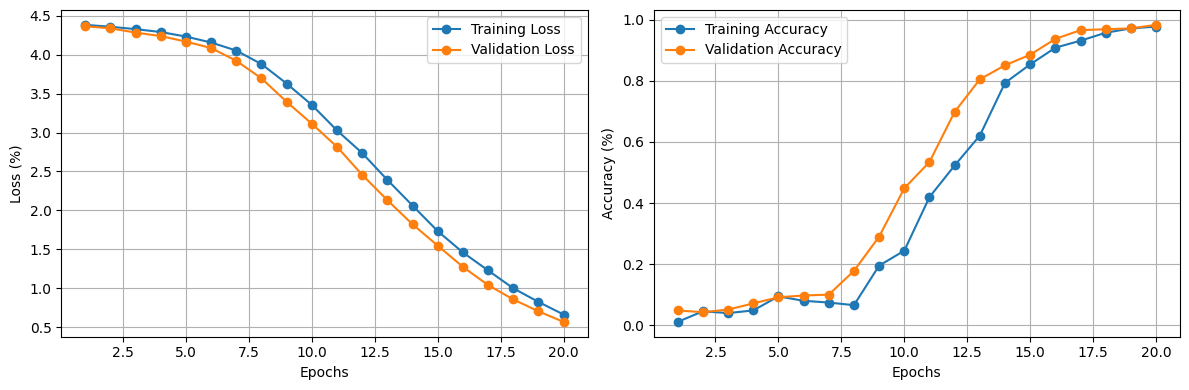

In [20]:
# Plotting
plt.figure(figsize=(12, 4))
epochs = range(1, 20 + 1)

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.grid()
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show();

In [21]:

random.shuffle(intents)

data_predict = intents[:2]

for idx in data_predict:
    texts = idx['text'] 
    intent = idx['intent']
    intent
    for text in texts:
        new_input_text = [text]
        new_input_sequences = tokenizer.texts_to_sequences(new_input_text)
        max_sequence_length = len(new_input_sequences)
        new_input_sequences = pad_sequences(new_input_sequences, maxlen=max_sequence_length)

        predictions = model.predict(new_input_sequences, verbose=0)
        predictions

        predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))
        predicted_labels

        for pred in predicted_labels:
            if intent == pred:
                print(f'Your text: {text}')
                print(' ')
                print(f"ChatBot: {random.choice(idx['responses'])}")
                print('______________________________________________')

'weight_management'

array([[0.00961172, 0.01586379, 0.00875344, 0.00801952, 0.02116139,
        0.0112704 , 0.01593548, 0.01735041, 0.01010534, 0.01128019,
        0.01430771, 0.01509095, 0.01146024, 0.01814627, 0.01235269,
        0.01123756, 0.01200977, 0.01027471, 0.01558193, 0.01008283,
        0.01355698, 0.01269448, 0.01488707, 0.0135951 , 0.01062169,
        0.01432773, 0.01188782, 0.01533077, 0.01642255, 0.00984858,
        0.01086846, 0.01144623, 0.00977546, 0.01311536, 0.00740322,
        0.00991827, 0.01271905, 0.00722186, 0.00836597, 0.00920175,
        0.01321399, 0.01271167, 0.01502645, 0.01142552, 0.00990635,
        0.0127547 , 0.0126021 , 0.01188257, 0.01202393, 0.00925583,
        0.01474996, 0.01493531, 0.01201217, 0.0122172 , 0.01233676,
        0.01309074, 0.01115732, 0.01071875, 0.00993261, 0.01689577,
        0.01033031, 0.01581924, 0.01146556, 0.01379298, 0.00788525,
        0.00854032, 0.01453984, 0.0101504 , 0.01575967, 0.01174022,
        0.01181577, 0.01560716, 0.01219733, 0.01

array(['addiction_recovery'], dtype='<U23')

array([[0.01323776, 0.01053204, 0.01549948, 0.01629296, 0.00953691,
        0.01350652, 0.01285496, 0.01201601, 0.01292638, 0.00977752,
        0.0166128 , 0.01100823, 0.01055611, 0.0122056 , 0.0122149 ,
        0.01387329, 0.01019991, 0.01067343, 0.01620132, 0.01150386,
        0.01173233, 0.01332516, 0.01481605, 0.0155005 , 0.01240689,
        0.01111757, 0.01172677, 0.01267127, 0.01247143, 0.01401753,
        0.0122801 , 0.01340218, 0.01456044, 0.01684818, 0.01079253,
        0.01006001, 0.01030731, 0.01343005, 0.01285211, 0.01181675,
        0.01056195, 0.01089195, 0.01424484, 0.01176852, 0.01456707,
        0.01101747, 0.01135361, 0.01168466, 0.01374034, 0.01232232,
        0.01261389, 0.01303975, 0.00993343, 0.00938776, 0.01376767,
        0.01217138, 0.01026268, 0.01446787, 0.0134885 , 0.00978459,
        0.0127201 , 0.01261843, 0.01172942, 0.01336978, 0.01165719,
        0.01072923, 0.0127765 , 0.01278976, 0.01028476, 0.01267441,
        0.01086602, 0.01235119, 0.01419899, 0.00

array(['weight_management'], dtype='<U23')

Your text: Maintaining a healthy weight
 
ChatBot: Healthy weight loss involves a balanced diet and regular exercise. Maintain a healthy weight by adopting a sustainable lifestyle. BMI measures body fat based on height and weight. Avoiding processed foods, sugary drinks, and staying active can prevent weight gain.
______________________________________________


array([[0.01110893, 0.01238614, 0.01020194, 0.01110078, 0.0120032 ,
        0.01123214, 0.0138001 , 0.01436009, 0.0111365 , 0.01015011,
        0.01608955, 0.01149776, 0.01163941, 0.0149248 , 0.01238597,
        0.01360544, 0.00989318, 0.01145407, 0.01655185, 0.01023875,
        0.0127837 , 0.01306913, 0.01548486, 0.01405352, 0.01168904,
        0.012792  , 0.01169658, 0.01357305, 0.01432135, 0.01331687,
        0.01169078, 0.01242862, 0.01160233, 0.0155633 , 0.00876954,
        0.01055962, 0.01206624, 0.00980041, 0.01052145, 0.01175755,
        0.01229862, 0.01292452, 0.01421534, 0.01412152, 0.01338709,
        0.01263542, 0.01256303, 0.01139457, 0.01448813, 0.01131644,
        0.01387288, 0.01433352, 0.01021088, 0.01037033, 0.01298031,
        0.01237828, 0.00934905, 0.01342316, 0.01172448, 0.01196348,
        0.01106276, 0.01333364, 0.01139814, 0.01279255, 0.00961996,
        0.01003205, 0.01332972, 0.0111625 , 0.012722  , 0.01365005,
        0.01250382, 0.01392202, 0.0135042 , 0.01

array(['weight_management'], dtype='<U23')

Your text: Understanding body mass index (BMI)
 
ChatBot: Healthy weight loss involves a balanced diet and regular exercise. Maintain a healthy weight by adopting a sustainable lifestyle. BMI measures body fat based on height and weight. Avoiding processed foods, sugary drinks, and staying active can prevent weight gain.
______________________________________________


array([[0.00733344, 0.01754515, 0.00801392, 0.00581312, 0.02161071,
        0.00824054, 0.01501932, 0.01733038, 0.00961014, 0.01185855,
        0.01469327, 0.01720649, 0.00952004, 0.01739091, 0.01302935,
        0.00917258, 0.00923439, 0.01000911, 0.01365843, 0.01020403,
        0.01364774, 0.00988814, 0.01736272, 0.01355187, 0.00897657,
        0.01452396, 0.01183779, 0.02053865, 0.01398888, 0.0118063 ,
        0.01054095, 0.01045649, 0.01050523, 0.014518  , 0.00457721,
        0.00783476, 0.00860419, 0.00706609, 0.0095228 , 0.00806843,
        0.01175108, 0.00902986, 0.01423977, 0.01535274, 0.00913765,
        0.01176212, 0.0132088 , 0.01130094, 0.00970445, 0.00891962,
        0.01790303, 0.01448661, 0.00856048, 0.00932533, 0.01515872,
        0.01330343, 0.0078971 , 0.01255617, 0.01018158, 0.01397319,
        0.00814211, 0.0114313 , 0.01309915, 0.01011984, 0.00815691,
        0.00705369, 0.03382991, 0.00735525, 0.01987601, 0.01383342,
        0.01104257, 0.01982313, 0.01464509, 0.01

array(['sexual_health'], dtype='<U23')

'sleep_disorders'

array([[0.01277287, 0.01406187, 0.01295732, 0.01045859, 0.01772355,
        0.01173306, 0.01239418, 0.01321987, 0.01122552, 0.01357976,
        0.01287214, 0.01438998, 0.01049795, 0.01297508, 0.01240489,
        0.01105725, 0.01500776, 0.01293974, 0.01136389, 0.01372897,
        0.01375299, 0.0104138 , 0.01471545, 0.01206924, 0.01165183,
        0.01177011, 0.01198062, 0.0134053 , 0.01373823, 0.0123103 ,
        0.01271499, 0.01128916, 0.01213098, 0.01105618, 0.01031137,
        0.01142202, 0.01358107, 0.01021314, 0.01315856, 0.01073639,
        0.01474216, 0.01313519, 0.0116997 , 0.01192491, 0.0098505 ,
        0.01294737, 0.01406952, 0.01314986, 0.00944882, 0.01143167,
        0.01281011, 0.01009253, 0.01351432, 0.01300082, 0.01313198,
        0.01225492, 0.01194121, 0.01149214, 0.01010237, 0.0122299 ,
        0.0086697 , 0.0110848 , 0.01249109, 0.01024514, 0.01117193,
        0.01236941, 0.01536092, 0.01159776, 0.0227703 , 0.01464408,
        0.01421692, 0.01522786, 0.01093187, 0.01

array(['sleep_disorders'], dtype='<U23')

Your text: Symptoms of sleep disorders
 
ChatBot: Symptoms of sleep disorders include difficulty falling or staying asleep. Insomnia treatment may involve therapy or medications. Sleep apnea may require CPAP machines or surgery. Improve sleep quality by creating a bedtime routine, limiting screen time, and maintaining a comfortable sleep environment.
______________________________________________


array([[0.00971697, 0.01793987, 0.01119381, 0.00812724, 0.01653316,
        0.00929244, 0.00946595, 0.0122362 , 0.01109716, 0.01352259,
        0.01470991, 0.01237442, 0.01154933, 0.01487877, 0.01226174,
        0.01168099, 0.01202225, 0.01191195, 0.01241679, 0.01166079,
        0.01229682, 0.00971943, 0.01704047, 0.01189554, 0.00997331,
        0.01268381, 0.01299476, 0.01353679, 0.01431257, 0.0144162 ,
        0.01127063, 0.01104979, 0.01092036, 0.01325645, 0.00731567,
        0.00954429, 0.01402995, 0.00928938, 0.01337831, 0.01131796,
        0.01560171, 0.01225899, 0.01447559, 0.01743775, 0.00776539,
        0.01292056, 0.01617919, 0.01419122, 0.01214457, 0.01013405,
        0.01541935, 0.00952349, 0.00839578, 0.01022538, 0.01549779,
        0.01167216, 0.0076026 , 0.01384865, 0.00957188, 0.0102124 ,
        0.00634445, 0.01009536, 0.01273956, 0.00797359, 0.00972369,
        0.01036441, 0.01924933, 0.00920424, 0.02392838, 0.02418147,
        0.01559335, 0.01806668, 0.0101629 , 0.01

array(['sleep_health'], dtype='<U23')

array([[0.01110383, 0.01503498, 0.01184071, 0.00915774, 0.01893241,
        0.01158897, 0.01305308, 0.01470341, 0.01106904, 0.01351607,
        0.01385264, 0.01423445, 0.00983984, 0.01461871, 0.01296774,
        0.01028388, 0.01330217, 0.01239462, 0.01191323, 0.01314755,
        0.01393689, 0.0104143 , 0.01567102, 0.0126389 , 0.01154584,
        0.01322975, 0.0114358 , 0.01467076, 0.01442164, 0.0123604 ,
        0.01244072, 0.01081681, 0.01136041, 0.01144795, 0.00904793,
        0.01034865, 0.01267652, 0.00968027, 0.0129015 , 0.00993437,
        0.01354419, 0.01173577, 0.01238594, 0.01300917, 0.00980463,
        0.01250078, 0.01472879, 0.01305652, 0.00947456, 0.01027515,
        0.01372647, 0.01054451, 0.01167343, 0.01251371, 0.01519876,
        0.01248344, 0.01054285, 0.01204714, 0.0101367 , 0.01220937,
        0.00827164, 0.01122567, 0.01246251, 0.00989949, 0.01013183,
        0.01053192, 0.01739937, 0.01095377, 0.02373287, 0.01413829,
        0.01407227, 0.01620731, 0.01179767, 0.01

array(['sleep_disorders'], dtype='<U23')

Your text: Dealing with sleep apnea
 
ChatBot: Symptoms of sleep disorders include difficulty falling or staying asleep. Insomnia treatment may involve therapy or medications. Sleep apnea may require CPAP machines or surgery. Improve sleep quality by creating a bedtime routine, limiting screen time, and maintaining a comfortable sleep environment.
______________________________________________


array([[0.01010309, 0.01667456, 0.01049739, 0.00768927, 0.01731793,
        0.00894457, 0.01124398, 0.01317716, 0.01121922, 0.0121166 ,
        0.01344123, 0.01338117, 0.01307182, 0.01591467, 0.01212157,
        0.0120259 , 0.01291309, 0.01239439, 0.01246043, 0.01086605,
        0.01299684, 0.01046789, 0.01572139, 0.01147811, 0.01027753,
        0.01198591, 0.01260224, 0.01335221, 0.01518349, 0.01214131,
        0.01034421, 0.01155777, 0.01007848, 0.01237225, 0.0075165 ,
        0.01066286, 0.0142555 , 0.00789477, 0.01127705, 0.01151334,
        0.01606021, 0.01336654, 0.01470814, 0.01487098, 0.00828198,
        0.01431768, 0.01475205, 0.01366415, 0.01265248, 0.01009462,
        0.01570148, 0.01120868, 0.01000041, 0.01107502, 0.01266476,
        0.01154172, 0.00913694, 0.01253273, 0.00988136, 0.01224164,
        0.00748025, 0.01191507, 0.01218499, 0.00906699, 0.00938435,
        0.0109487 , 0.01709594, 0.00960443, 0.02345484, 0.02193673,
        0.01560684, 0.01831913, 0.00986808, 0.01

array(['sleep_disorders'], dtype='<U23')

Your text: Improving sleep quality
 
ChatBot: Symptoms of sleep disorders include difficulty falling or staying asleep. Insomnia treatment may involve therapy or medications. Sleep apnea may require CPAP machines or surgery. Improve sleep quality by creating a bedtime routine, limiting screen time, and maintaining a comfortable sleep environment.
______________________________________________


In [22]:

text = input('Your text: ')
new_input_text = [text]
new_input_sequences = tokenizer.texts_to_sequences(new_input_text)
max_sequence_length = len(new_input_sequences)
new_input_sequences = pad_sequences(new_input_sequences, maxlen=max_sequence_length)

predictions = model.predict(new_input_sequences, verbose=0)

predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))
i = next((index for (index, d) in enumerate(intents) if d['intent']== predicted_labels[0]),None)
idx = intents[i]

while predicted_labels != 'goodbye':
    for pred in predicted_labels:
        print("ChatBot: ",random.choice(idx['responses']))
        print('______________________________________________')
    
    text = input('Your text: ')
    new_input_text = [text]
    new_input_sequences = tokenizer.texts_to_sequences(new_input_text)
    max_sequence_length = len(new_input_sequences)
    new_input_sequences = pad_sequences(new_input_sequences, maxlen=max_sequence_length)

    predictions = model.predict(new_input_sequences, verbose=0)

    predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))
    i = next((index for (index, d) in enumerate(intents) if d['intent']== predicted_labels[0]),None)
    idx = intents[i]
    
for pred in predicted_labels:
        print("ChatBot: ",random.choice(idx['responses']))
        print('______________________________________________')

ChatBot:  It seem that you are suffering from Asthma
______________________________________________
ChatBot:  goodbye
______________________________________________
